<a href="https://colab.research.google.com/github/JeanMichelDeveloper/Training/blob/main/Extract_foreground_in_an_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install opencv
!pip install opencv-contrib-python==4.6.00.66

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#import necessary libraries
import cv2
from google.colab.patches import cv2_imshow
import numpy
import plotly.express as px

In [3]:
!wget "https://cdn.pixabay.com/photo/2015/04/28/19/15/stop-sign-744192__480.jpg"

--2022-12-16 10:36:27--  https://cdn.pixabay.com/photo/2015/04/28/19/15/stop-sign-744192__480.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 172.64.150.12, 104.18.37.244, 2606:4700:4400::ac40:960c, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|172.64.150.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95033 (93K) [binary/octet-stream]
Saving to: ‘stop-sign-744192__480.jpg.2’

stop-sign-744192__4 100%[===================>]  92.81K  --.-KB/s    in 0.006s  

2022-12-16 10:36:27 (14.2 MB/s) - ‘stop-sign-744192__480.jpg.2’ saved [95033/95033]



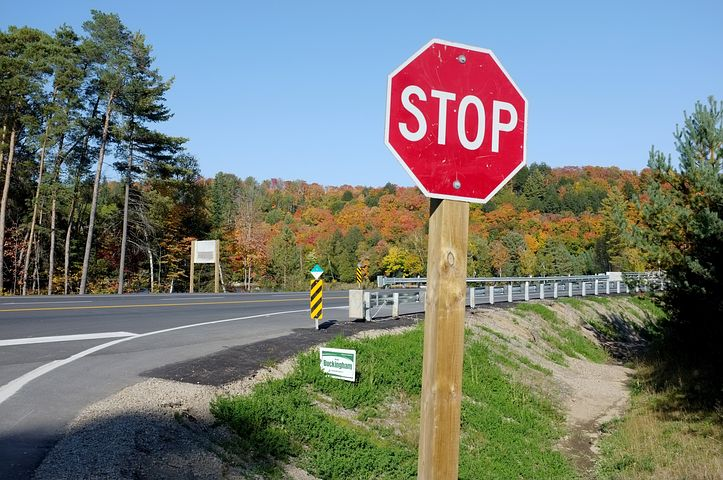

In [4]:
image = cv2.imread("stop-sign-744192__480.jpg")

cv2_imshow(image)


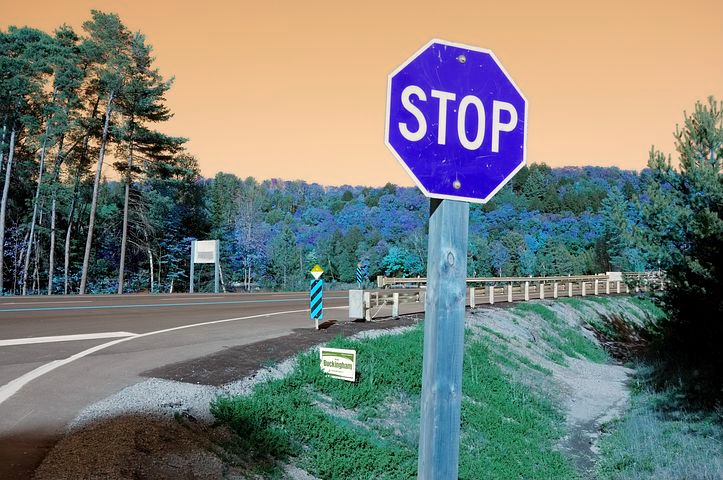

In [5]:
#display image with coordinate
px.imshow(image)

In [6]:
#determine rectangle used to identify foreground
x = 380
y = 35
width = 180
height = 180
rect = (x, y, width, height)

In [7]:
#create mask
mask = numpy.zeros(image.shape[:2], numpy.uint8)

background_model = numpy.zeros((1,65), numpy.float64)

foreground_model = numpy.zeros((1,65), numpy.float64)

iterations = 10

cv2.grabCut(image,
            mask,
            rect = rect,
            bgdModel = background_model,
            fgdModel = foreground_model,
            iterCount = iterations,
            mode = cv2.GC_INIT_WITH_RECT)

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[ 2.07516974e-01,  2.32544253e-01,  1.80652886e-01,
          1.67961930e-01,  2.11323957e-01,  4.76288853e+01,
          1.00500029e+02,  8.77472394e+01,  2.37763415e+02,
          1.90945360e+02,  1.43654632e+02,  1.61804500e+02,
          1.66917837e+02,  1.65632389e+02,  3.26330530e+01,
          3.43522215e+01,  2.92627495e+01,  9.22536288e+01,
          1.20336632e+02,  1.27564243e+02,  4.72041784e+02,
          4.94074765e+02,  4.52512165e+02,  4.94074765e+02,
          9.11335476e+02,  6.42249445e+02,  4.52512165e+02,
          6.42249445e+02,  6.54258983e+02,  4.67050841e+01,
          7.12825594e+01,  9.98082692e+01,  7.12825594e+01,
          1.14397374e+02,  1.59754412e+02,  9.98082692e+01,
          1.59754412e+02,  2.29178605e+02,  1.54420933

In [8]:
created_mask = numpy.where((mask == 2) | (mask == 0), 0, 1).astype("uint8")

created_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

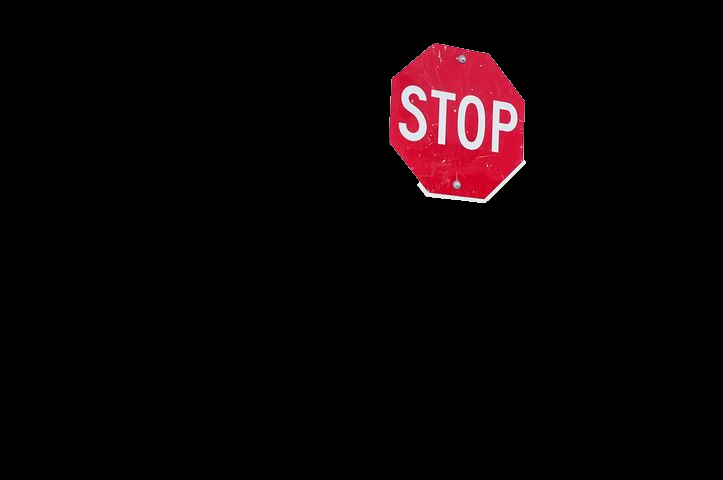

In [9]:
mask_image = image * created_mask[:, :, numpy.newaxis]

cv2_imshow(mask_image)